In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import *
import pandas as pd
import cv2

sns.set_theme()

In [12]:
# def get_list():
#     print('get list')
#     return [1,2,3,4,5]
# 
# def my_generator():
#     print('start')
#     yield 1
#     print('**1')
#     yield 2
#     print('**2')
#     yield 3
#     print('**3')
#     yield 4
#     
#     
# def square(items):
#     for i in items:
#         s = i**2
#         print('SQUARE', i)
#         yield s
# 
# 
# gen = my_generator()
# square_gen = square(gen)
# 
# for x in square_gen:
#     print('Get element -> ', x)
    # if x >= 2:
    #     break

start
SQUARE 1
Get element ->  1
**1
SQUARE 2
Get element ->  4
**2
SQUARE 3
Get element ->  9
**3
SQUARE 4
Get element ->  16


In [109]:
root_dataset = Path('./mnist_png')

files = root_dataset.rglob('*.png')
# files = (x for x in files if x.is_file())

rows = []

for f in files:
    rows.append({
        'path': str(f),
        'label': int(f.parent.name),
        'split': f.parent.parent.name
    })
    # break
    
df  = pd.DataFrame(rows)
df = df.sample(frac=1)
df

,path,label,split
15100,mnist_png/train/2/14517.png,2,train
65732,mnist_png/train/1/58876.png,1,train
1078,mnist_png/test/0/8172.png,0,test
33271,mnist_png/train/4/12726.png,4,train
46126,mnist_png/train/3/51534.png,3,train
...,...,...,...
38149,mnist_png/train/8/28381.png,8,train
41338,mnist_png/train/7/38178.png,7,train
63547,mnist_png/train/1/6617.png,1,train
910,mnist_png/test/2/2625.png,2,test


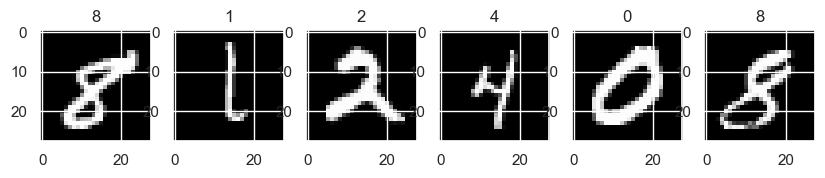

In [110]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(10,4))


for _ax, (idx, row) in zip(ax, df.sample(6).iterrows()):
    img = cv2.imread(row.path)
    _ax.imshow(img)
    _ax.set_title(row.label)
    
    


In [111]:
train_df = df[df.split == 'train']
test_df = df[df.split == 'test']

train_df.shape, test_df.shape


((60000, 3), (10000, 3))

# D A T A S E T

In [63]:
# lst = [1,2,3,4,5,6]
# 
# ds = tf.data.Dataset.from_tensor_slices(lst)
# ds = ds.map(lambda x: x**2)
# ds
# 
# for sample in ds:
#     print(sample)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)


In [118]:
def make_dataset(df_to_use, flatten=True, batch_size=None):
    path_list = df_to_use.path

    ds_x = tf.data.Dataset.from_tensor_slices(path_list)
    ds_x = ds_x.map(lambda x: tf.io.read_file(x))
    ds_x = ds_x.map(lambda x: tf.image.decode_png(x))
    ds_x = ds_x.map(lambda x: x / 255)
    
    if flatten:
        ds_x = ds_x.map(lambda x: tf.reshape(x, (784,)))
    else:
        ds_x = ds_x.map(lambda x: tf.reshape(x, (28, 28, 1)))
        
        
        
    ds_y = tf.data.Dataset.from_tensor_slices(df_to_use.label)

    ds = tf.data.Dataset.zip((ds_x, ds_y))

    if batch_size:
        ds = ds.batch(batch_size, drop_remainder=True)
    return ds


train_ds = make_dataset(train_df, batch_size=32)
test_ds = make_dataset(test_df, batch_size=32)
train_ds

# for sample in train_ds:
#     img, label = sample
#     print(img.shape, img.dtype)
#     plt.imshow(img)
#     plt.title(label)
#     break
# # ds


<_BatchDataset element_spec=(TensorSpec(shape=(32, 784), dtype=tf.float32, name=None), TensorSpec(shape=(32,), dtype=tf.int64, name=None))>

In [108]:
# sample = next(iter(test_ds))
# imgs, labels = sample
# imgs.shape

# MODEL

In [113]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, validation_data=test_ds, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2500 - accuracy: 0.9250 - val_loss: 0.1403 - val_accuracy: 0.9561
Epoch 2/2
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1042 - accuracy: 0.9678 - val_loss: 0.1131 - val_accuracy: 0.9618


In [120]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])


train_ds_2d = make_dataset(train_df, batch_size=32, flatten=False)
test_ds_2d = make_dataset(test_df, batch_size=32, flatten=False)
# train_ds_2d

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 
model.fit(train_ds_2d, validation_data=test_ds_2d, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1398 - accuracy: 0.9576 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 2/2
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0335 - val_accuracy: 0.9883


In [122]:
# tf.__version__